In [1]:
import keras
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import opendatasets as od

Using TensorFlow backend.


In [2]:
os.listdir('aptos2019-blindness-detection/')

['test_images',
 '.DS_Store',
 'test.csv',
 'train.csv',
 'train_images',
 'sample_submission.csv']

### Read data

In [21]:
train_df = pd.read_csv('aptos2019-blindness-detection/train.csv')

In [22]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


### Check the number of images and class distribution

In [23]:
train_df.shape

(3662, 2)

In [52]:
# group by classes
train_nodr = train_df[train_df['diagnosis']==0]
train_mild = train_df[train_df['diagnosis']==1]
train_moderate = train_df[train_df['diagnosis']==2]
train_severe = train_df[train_df['diagnosis']==3]
train_proliferative = train_df[train_df['diagnosis']==4]
train_nodr.reset_index(drop=True,inplace=True)
train_mild.reset_index(drop=True,inplace=True)
train_moderate.reset_index(drop=True,inplace=True)
train_severe.reset_index(drop=True,inplace=True)
train_proliferative.reset_index(drop=True,inplace=True)

In [53]:
# labels = ['No_DR','Mild','Moderate','Severe','Proliferative_DR']
# # for i in range(5):
# #     path_to_save = os.path.join('aptos2019-blindness-detection/train_images/',labels[i])
# #     os.mkdir(path_to_save)
# for i in range(1,5):
#     temp_df = train_df[train_df['diagnosis']==i]
#     for index, row in temp_df.iterrows():
#         image = PIL.Image.open(os.path.join('aptos2019-blindness-detection/train_images/',row['id_code']+'.png'))
#         path_to_save = os.path.join('aptos2019-blindness-detection/train_images/',labels[i])
# #         os.mkdir(path_to_save)
#         image.save(os.path.join(path_to_save, row['id_code']+'.png'))
    
    

Text(0, 0.5, 'Number of images')

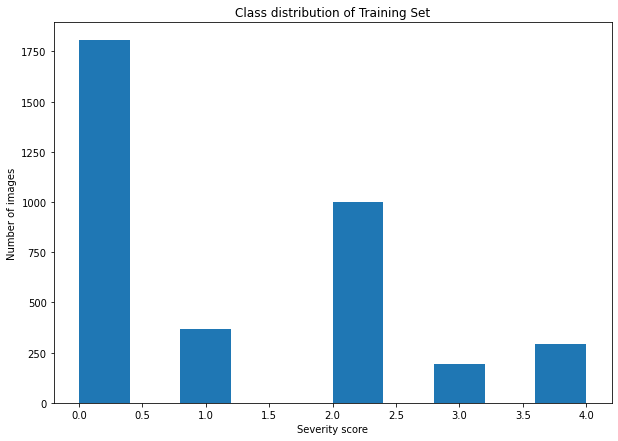

In [54]:
figure = plt.figure(figsize=(10,7))
plt.hist(train_df['diagnosis'])
plt.title('Class distribution of Training Set')
plt.xlabel('Severity score')
plt.ylabel('Number of images')

### Perform data visualization

In [55]:
train_nodr['diagnosis']

0       0
1       0
2       0
3       0
4       0
       ..
1800    0
1801    0
1802    0
1803    0
1804    0
Name: diagnosis, Length: 1805, dtype: int64

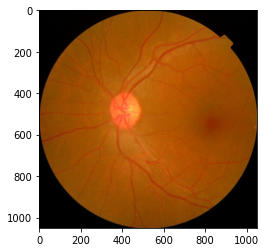

In [57]:
# fig, ax = plt.subplots(5,5)
images = os.listdir('aptos2019-blindness-detection/train_images/')
# print(type(images))
for i in range(1,5):
    im_path = os.path.join('aptos2019-blindness-detection/train_images/', train_nodr['id_code'][i]+'.png')
    im = PIL.Image.open(im_path)
    plt.imshow(im)